DSCI 2012 - Data Wrangling

# Working with Binary Data: Part 2 (Video)

This notebook shows you how to work with video and the images that make up video.


## OpenCV

Computer Vision is the application of AI to visual data. This can be images (comparing a face in a driver's license to a face presenting the driver's license to board a plan) or it can be video (processing of video by a self-driving car system). OpenCV is a library for computer vision work that is very popular in the data science world.

First, we'll have to install some things ordinarily not included with Anaconda distribution.

In [3]:
# CV2 - our hero library that lets us work with video
try:
    import cv2
except:
    !pip install opencv-python
    import cv2

# Import library that helps us deal with the file system and other operating system (os) stuff
import os

# numpy - for math
import numpy as np

#matplot lib for plots
import matplotlib.pyplot as plt

# Let's install and import Pillow - our old friend
try:
    from PIL import Image, ImageFilter
except:
    !pip install Pillow
    from PIL import Image, ImageFilter


## Loading a Video File

Now, let's go ahead and load in a video file. This sample file is in mp4 format. As we saw with images, there are many formats for video files and within each format there are many settings for video and audio.

In [4]:
# Create a VideoCapture object to read the video

cap = cv2.VideoCapture('bridge2.mp4')

## Playing the File

The variable "cap" is like a file handle - it references the video file and we can now loop through the video and display it, frame by frame. 

Run the next section to see the video.

*Note that we are also defining "q" as the quit command. Just type q to quit the video and close the window.*

In [5]:
while True:
    success, img = cap.read()
    # This will open an independent window
    if success:
        cv2.imshow("Our Cool Movie", img) 
    # define an escape key as 'q' so we can stop the window
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close


-1

## Changing a Frame

Each frame of a video can be edited as an image prior to display.

Let's show the movie again, but let's manipulate the images frame by frame. Just like Pillow that we used last time, OpenCV provides some image manipulation functionality.

In [24]:
cap = cv2.VideoCapture('bridge2.mp4')
while True:
    success, img = cap.read()
    
    # alright, let's change the image that makes up each frame
    # this uses something called a "Sobel" operator to detect edges
    # you can read about that here: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
    if success:
        ourChangedImage = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    
        # This will open an independent window
        cv2.imshow("Our Image Manipulation Experiment", ourChangedImage) 
    # define an escape key as 'q' so we can stop the window
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close

-1

## Resize

Very cool, but can we change the size of the video?

In [7]:
cap = cv2.VideoCapture('bridge2.mp4')
while True:
    success, img = cap.read()

    if success:
        # alright, let's change the image size by a percentage
        
        # percent of original size
        scale_percent = 40 
        
        #figure out new width and height
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
      
        # resize image
        ourResizedImage = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        
        # This will open an independent window
        cv2.imshow("Our Image Resize Experiment", ourResizedImage) 
    # define an escape key as 'q' so we can stop the window
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close

-1

## Cleaning Up Our Code

Man, we are repeating a lot of code. Let's define all this into a function.

In [10]:
# this function will show our video
# we're passing in the filename, the title for the window, and
# we're passing in a function that can be used to change the image

def bulldogVideoInator(fileName,windowTitle,imageManipulationFunction):
    cap = cv2.VideoCapture(fileName)
    while True:
        success, img = cap.read()
        if success:
            changedImage = imageManipulationFunction(img)
            cv2.imshow(windowTitle, changedImage) 
        # define an escape key as 'q' so we can stop the window
        if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
            cap.release()
            break

    cv2.destroyAllWindows() 
    cv2.waitKey(1)
    
# here's a function that takes an image and a scale percent 
# then returns the changed image
    
def imageResizer(img):
    
    scalePercent = 60
    
    #figure out new width and height
    width = int(img.shape[1] * scalePercent / 100)
    height = int(img.shape[0] * scalePercent / 100)
    dim = (width, height)
    # resize image
    return(cv2.resize(img, dim, interpolation = cv2.INTER_AREA))

# now, let's cleanly call the functions

#bulldogVideoInator('sample-15s.mp4','Our Elegantly Called Window',imageResizer)
bulldogVideoInator('bridge2.mp4','Our Elegantly Called Window',imageResizer)

Notice that we called our new clean function and gave it the filename of the video, a name for the popup window, the function we want for it to use to manipulate the image, and a scale to pass along to that function.

## Define a Video Filter to Blur Image

Let's try it again, but this time we'll define a new manipulation function that will blur the image.

In [14]:
def imageBlur(img):    
    #heck, we can even call our resizer from here
    imgSmaller = imageResizer(img)
    # return a blurred version
    return cv2.GaussianBlur(imgSmaller,(5,5),cv2.BORDER_DEFAULT)

# now, let's cleanly show the video and tell our function to use the imageBlur function we
# created

bulldogVideoInator('bridge2.mp4','Fuzzy Memories',imageBlur)


Nice, right? Less repetition of our video display code.

### Your Web Cam

Now, I hate to distract you from video manipulation with this cool aside, but OpenCV can also treat a live stream of video just like it treats a file. And very often, while doing research, especially with object detection, you'll want to use your web cam or a camera attached to your computer, as input for testing puposes. Let's just tell CV to open our webcam instead of the file. 

In [16]:
bulldogVideoInator(0,'The Most Beautiful Person in the World',imageResizer)

Amazing, right? The number "0" is how openCV defines the webcam on your computer. If you have other cameras attached, you could use other numbers.

## Exercise 1

Now, we'll just practice what we've learned.

In [19]:
# a. Write a function that takes an image as input, applies the sobel edge detection 
# version of the image, then scales down the image to 40% of the original size.
def sobelAndResizer(img):
    #sobel our image
    sobelImg = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

    #resizing the image to 40% of the original size
    scalePercent = 40
    
    #figure out new width and height
    width = int(sobelImg.shape[1] * scalePercent / 100)
    height = int(sobelImg.shape[0] * scalePercent / 100)
    dim = (width, height)
    # resize image
    return(cv2.resize(sobelImg, dim, interpolation = cv2.INTER_AREA))
    
# b. Display the webcam and ensure that, at each frame, the edge detection / scaling code
# runs on the frame
bulldogVideoInator(0,"Sobel Bulldog", sobelAndResizer)

## Pulling Out Frames for Analysis

Now, sometimes you want to pull out frames from a video as separate images for analysis. Let's grab 1 video per every 3 seconds from our test video without even showing the video.

<Figure size 2300x2300 with 0 Axes>

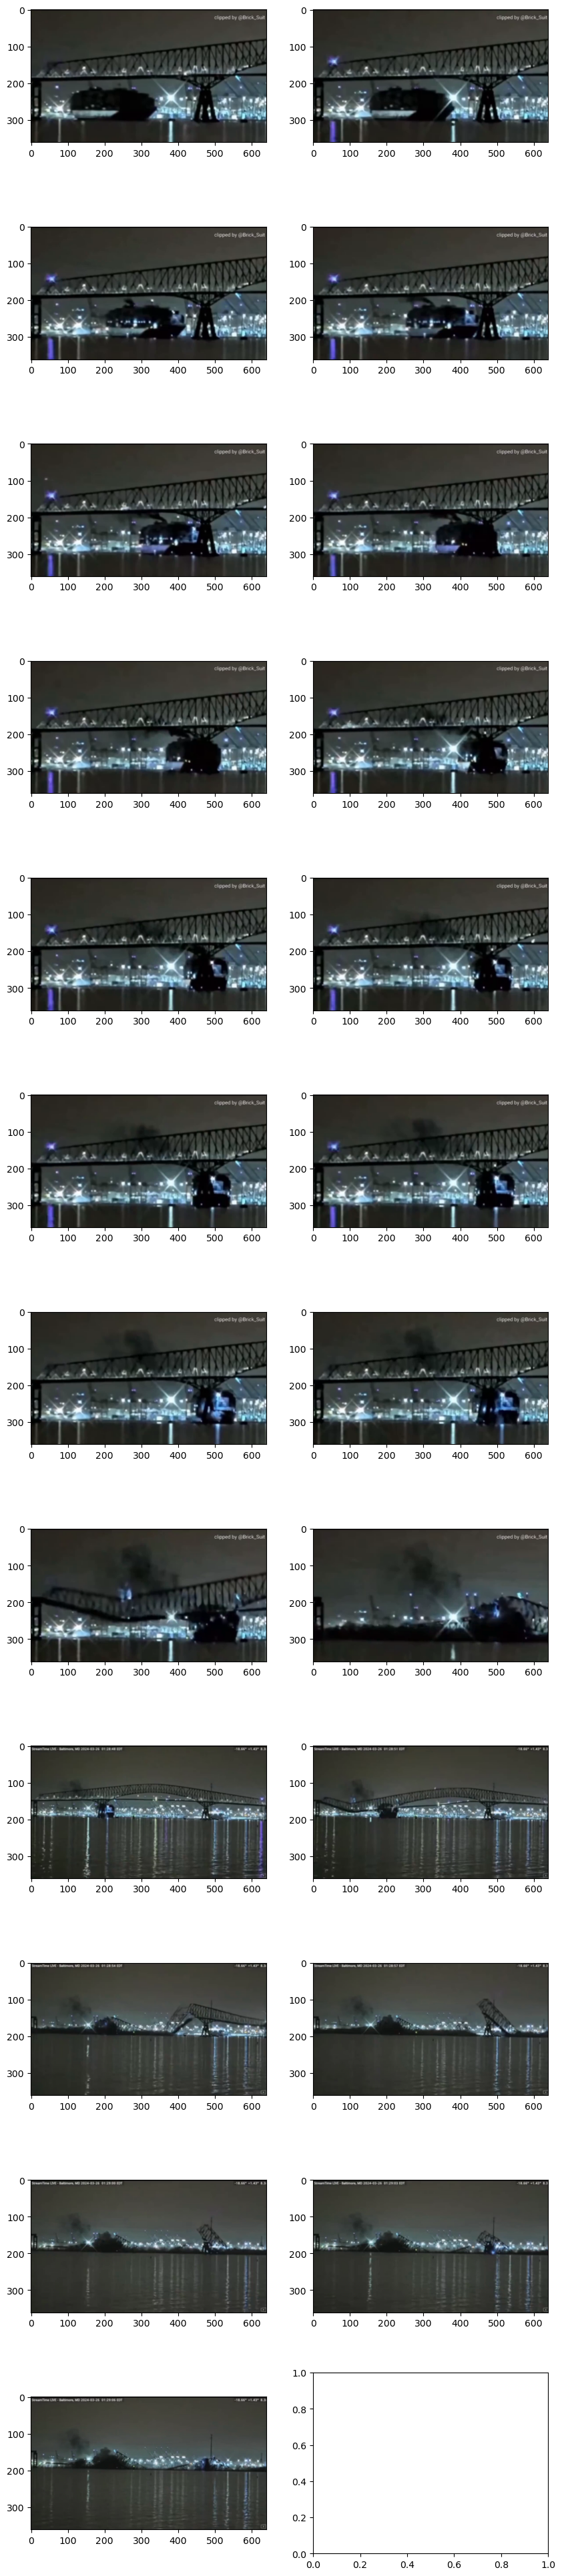

In [18]:
# declare a collection where we can hold the image
images = []

# open the video
cap = cv2.VideoCapture('bridge2.mp4')

# read a frame
success, image = cap.read()

# get the frames per second of this video
fps = cap.get(cv2.CAP_PROP_FPS)
multiplier = round(3 * fps)

while success:
    #current frame number
    frameId = int(round(cap.get(1)))
    # get the frame
    success, image = cap.read()
    if success:
        # if the frame can be divided by multiplier cleanly, add it to the collection of images
        if frameId % multiplier == 0:
            images.append(imageResizer(image))
        
cap.release()

# now, let's use those images in the collection "images" with mat plot lib to show them
# in a grid

plotHeight = len(images)
plt.figure(figsize=(plotHeight, plotHeight))

rows=round(len(images) / 2)
cols = 2
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10,50))

for i in range(rows):
    for j in range(cols):        
        if img_count < len(images):
            axes[i, j].imshow(images[img_count])
            img_count+=1



We could also then save the images from the collection or we could have saved them as we gathered them.

Here's a way to save them out of our collection using openCV.

In [21]:
imageId = 1
#initialzie a frames directory if it is not there already
os.makedirs("frames", exist_ok=True)
for image in images:
    #i am gonna be adding a line here to create a frames directory
    #this is to help my process in the next excercise

    cv2.imwrite("./frames/frame_%s.jpg" % str(imageId).zfill(2), image)
    imageId+=1

You should see five images in your folder. Notice that we used the += operator. Instead of imageId = imageID+1, we were able to just say imageID+=1.

## Exercise 2: Making a Video From Images

Sometimes we want to create a video from images that we have created one at a time (like an old flip-book animation). Let's use the  images (frames) we just wrote to create a movie. See if you can figure out how to create a movie using cv2 using documetation or the hint in Canvas.

In [26]:
# Put the code here to loop through your images and create a movie
frame_directory = "./frames"
#generating a function
#using the frames directory to loop through our images
def videoFromFrames(frame_directory, w,h):
    #choosingour codec for the video
    fourcc = cv2.VideoWriter_fourcc('m','p','4','v')

    #video write obj
    video = cv2.VideoWriter("./generated_video.mp4", fourcc, 1, (w,h))

    #loop through our directory
    with os.scandir(frame_directory) as fileList:
        for i in fileList:
            if i.is_file() and i.name.endswith(".jpg"):
                #read in our image
                img = cv2.imread(i.path)
                #resize our image
                resized_img = cv2.resize(img, (w,h))
                #write image to our video
                video.write(resized_img)

    #release our video writer to save file
    video.release()
    print("Generating video was successful.")

#calling our function to generate our video
videoFromFrames(frame_directory, 640, 480)

# Put the code here to show the movie you created
#video cap of "generated_video.mp4"
cap = cv2.VideoCapture('generated_video.mp4')

while True:
    success, img = cap.read()
    # This will open an independent window
    if success:
        cv2.imshow("Our Generated Video", img) 
    # define an escape key as 'q' so we can stop the window
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close


Generating video was successful.


-1

The video did play super fast, but if played normally through the system video player it worked fine.